In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

train = pd.read_csv('./Data/house_train.csv')
test =pd.read_csv('./Data/house_test.csv')

In [3]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15208,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1,15209,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
2,15210,20150124T000000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
3,15211,20141205T000000,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
4,15212,20140514T000000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6555 non-null   int64  
 1   date           6555 non-null   object 
 2   bedrooms       6555 non-null   int64  
 3   bathrooms      6555 non-null   float64
 4   sqft_living    6555 non-null   int64  
 5   sqft_lot       6555 non-null   int64  
 6   floors         6555 non-null   float64
 7   waterfront     6555 non-null   int64  
 8   view           6555 non-null   int64  
 9   condition      6555 non-null   int64  
 10  grade          6555 non-null   int64  
 11  sqft_above     6555 non-null   int64  
 12  sqft_basement  6555 non-null   int64  
 13  yr_built       6555 non-null   int64  
 14  yr_renovated   6555 non-null   int64  
 15  zipcode        6555 non-null   int64  
 16  lat            6555 non-null   float64
 17  long           6555 non-null   float64
 18  sqft_liv

In [7]:
X_all = train.drop(['price'], axis=1)
y = train['price']

print(type(X_all), type(y), X_all.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> (15035, 20) (15035,)


In [8]:
train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sel = ['sqft_living', 'sqft_lot', 'bedrooms','bathrooms','grade','sqft_above', 'view', 'floors',
       'waterfront', 'sqft_living15', 'yr_renovated', 'lat', 'sqft_basement', 'sqft_lot15']  # 'bedrooms' , 'bathrooms', 
X = X_all[sel]
y = train['price']
nor_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
print("정규화 : ", nor_X.shape, y.shape)

정규화 :  (15035, 14) (15035,)


In [11]:
#  정규화 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, 
                                                    random_state=42)
# 정규화 데이터 사용 안함.
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    random_state=42)

In [12]:
model = RandomForestRegressor(n_estimators=5, random_state=2)

In [13]:
print( model.fit(X_train, y_train) )
print( model.score(X_train, y_train))
print( model.score(X_test, y_test))

RandomForestRegressor(n_estimators=5, random_state=2)
0.9525758416482708
0.7548385992093708


In [14]:
# 학습된 랜덤포레스트의 트리 모델
print(model.estimators_)
print(model.score)
print("\n\n{}".format(model.base_estimator))
print("부트스트랩 : {}".format(model.bootstrap))
print("노드 분할 기준 : {}".format(model.criterion))

[DecisionTreeRegressor(max_features='auto', random_state=1872583848), DecisionTreeRegressor(max_features='auto', random_state=794921487), DecisionTreeRegressor(max_features='auto', random_state=111352301), DecisionTreeRegressor(max_features='auto', random_state=1853453896), DecisionTreeRegressor(max_features='auto', random_state=213298710)]
<bound method RegressorMixin.score of RandomForestRegressor(n_estimators=5, random_state=2)>


DecisionTreeRegressor()
부트스트랩 : True
노드 분할 기준 : mse


In [15]:
model.feature_importances_

array([0.38487418, 0.0231631 , 0.00605833, 0.01171116, 0.22350949,
       0.02239886, 0.0228957 , 0.00457707, 0.02537897, 0.03709567,
       0.00890944, 0.18738148, 0.01354061, 0.02850593])

In [16]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

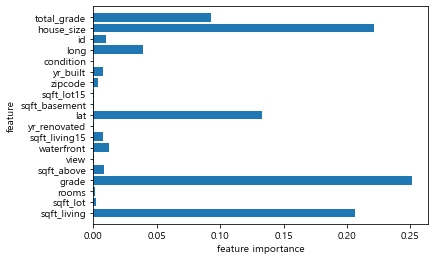

In [55]:
feature_names = sel
n_features = X.shape[1]
plot_feature_important_up(model, n_features, feature_names)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, random_state=42)
model_5 = RandomForestRegressor(n_estimators=5, random_state=2)  # 5개의 트리 
model_5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=2)

In [19]:
print( model_5.score(X_train, y_train))
print( model_5.score(X_test, y_test))

0.9525758416482708
0.7548385992093708


In [20]:
train.corr()['price']

id               0.020899
price            1.000000
bedrooms         0.323672
bathrooms        0.525479
sqft_living      0.702899
sqft_lot         0.096793
floors           0.262588
waterfront       0.265738
view             0.400806
condition        0.039740
grade            0.667211
sqft_above       0.608577
sqft_basement    0.322218
yr_built         0.047290
yr_renovated     0.140808
zipcode         -0.051498
lat              0.301604
long             0.023547
sqft_living15    0.586419
sqft_lot15       0.086384
Name: price, dtype: float64

In [21]:
train['rooms'] = train['bedrooms'] + train['bathrooms']
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'rooms'],
      dtype='object')

In [22]:
train['house_size'] = train['sqft_above'] + train['sqft_basement']

In [23]:
train['total_grade'] = train['grade'] + train['view'] + train['condition']

In [30]:
X_all = train.drop(['price'], axis=1)
y = train['price']

print(type(X_all), type(y), X_all.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> (15035, 23) (15035,)


In [31]:
train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms,house_size,total_grade
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,...,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269,0.061085,0.041725,0.005186
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,...,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384,0.475526,0.702899,0.685379
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,...,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242,0.895620,0.596974,0.325123
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,...,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120,0.852223,0.755853,0.519349
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,...,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176,0.765102,1.000000,0.661896
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,...,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458,0.067526,0.176500,0.123445
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,...,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287,0.383902,0.363193,0.247098
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,...,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255,0.036621,0.108137,0.250465
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,...,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501,0.151284,0.282821,0.664735
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,...,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873,-0.044540,-0.054213,0.313417


In [33]:
%%time


sel = ['sqft_living', 'sqft_lot', 'rooms','grade','sqft_above', 'view',
       'waterfront', 'sqft_living15', 'yr_renovated', 'lat', 'sqft_basement', 'sqft_lot15',
      'zipcode', 'yr_built', 'condition', 'long', 'id','house_size','total_grade']
X = X_all[sel]
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(nor_X, y, 
                                                    random_state=42)
nor_X = MinMaxScaler().fit_transform(X)

model = RandomForestRegressor(n_estimators=100, 
                              random_state=2,
                              n_jobs=-1)  # 100개의 트리 
model.fit(X_train, y_train)

print( model.score(X_train, y_train))
print( model.score(X_test, y_test))

0.9834145703095307
0.8464548730323731
Wall time: 2.36 s


### 변경이력
 * bedrooms, bathrooms 를 더하여 새로운 특징을 만들고, 원래 2개의 특징을 선택 안함
    * 0.8329471874174998 -> 0.8340175171614645
 * bedrooms, bathrooms 를 더하여 새로운 특징을 만들고, 원래 2개의 특징을 선택
    * 0.8340175171614645 -> 0.8329471874174998

In [26]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms,house_size,total_grade
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,4.00,1180,10
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,3.00,770,9
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,5.00,1680,11
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,5.25,1715,10
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,4.50,1060,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,2014,0,98056,47.5137,-122.167,2520,6023,6.50,2520,12
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2009,0,98136,47.5537,-122.398,2050,6200,7.50,3510,12
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,5.50,1530,11
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,6.50,2310,11


### 유방암 데이터

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

# 데이터 확인
print(cancer.keys())
print(cancer.target_names)      # 목적변수(종속변수)      
print(cancer.target) 
print(cancer.feature_names)
print(cancer.data.shape)        # 569행 , 30열
print(cancer.data)              # 설명변수(독립변수)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 

In [53]:
# 데이터 나누기 
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 생성 및 학습
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [36]:
# 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [43]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_   # feature의 중요도
    plt.barh(range(n_features), imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)  # y축의 축의값
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

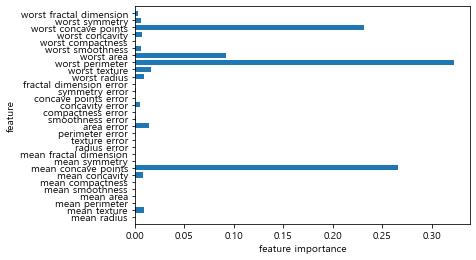

In [44]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(gbrt, feature_num, feature_names)

### 실습 5-4 집값데이터를 이용해서 그레디언트 부스팅 트리 모델을 적용시키고, 파라미터를 변경해 보자. 그리고 해당 결과를 확인해 보자.

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
%%time

sel = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms','grade','sqft_above', 'view',
       'waterfront', 'sqft_living15', 'yr_renovated', 'lat', 'sqft_basement', 'sqft_lot15',
      'zipcode', 'yr_built', 'long', 'id','house_size','total_grade']
X = X_all[sel]
y = train['price']

#nor_X = MinMaxScaler().fit_transform(X)
# 정규화 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

model = RandomForestRegressor(max_depth=5, random_state=0)   # default max_depth = 3
model.fit(X_train, y_train)

print( model.score(X_train, y_train))
print( model.score(X_test, y_test))

0.827922354666345
0.7404765092572505
Wall time: 2.94 s


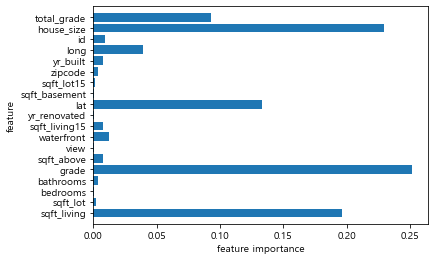

In [75]:
feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(model, len(sel), sel)

In [76]:
%%time

for depth in [1,3,5,7,9]:
    for rate in [0.1, 0.2, 0.3, 0.4]:
        model = GradientBoostingRegressor(max_depth  = depth, random_state=0,
                                         learning_rate=rate)   # default max_depth = 3
        model.fit(X_train, y_train)
        
        print(f"depth : {depth}, rate : {rate}")
        print( model.score(X_train, y_train))
        print( model.score(X_test, y_test))

depth : 1, rate : 0.1
0.774831348747612
0.7479945149242347
depth : 1, rate : 0.2
0.8149020539503982
0.7720498687457615
depth : 1, rate : 0.3
0.823699623265113
0.7754553337276875
depth : 1, rate : 0.4
0.8276057724996295
0.7815417251596946
depth : 3, rate : 0.1
0.9126659487862517
0.8381016567944478
depth : 3, rate : 0.2
0.9301952319630834
0.8471615899413951
depth : 3, rate : 0.3
0.9402725676755678
0.8604510072142131
depth : 3, rate : 0.4
0.946278678181627
0.860925782380503
depth : 5, rate : 0.1
0.9548688510548706
0.8595170173608702
depth : 5, rate : 0.2
0.9675146960626612
0.8534388893476754
depth : 5, rate : 0.3
0.9740786967748485
0.850039929053029
depth : 5, rate : 0.4
0.9781547046194761
0.8344001798232417
depth : 7, rate : 0.1
0.9784524291369734
0.8551595503364726
depth : 7, rate : 0.2
0.9873688135026912
0.8533122540890137
depth : 7, rate : 0.3
0.9918569891959242
0.8380522758745884
depth : 7, rate : 0.4
0.9942599726997834
0.8438265489927348
depth : 9, rate : 0.1
0.9928658281924366
0.83

In [62]:
train.corr()['price']

id               0.020899
price            1.000000
bedrooms         0.323672
bathrooms        0.525479
sqft_living      0.702899
sqft_lot         0.096793
floors           0.262588
waterfront       0.265738
view             0.400806
condition        0.039740
grade            0.667211
sqft_above       0.608577
sqft_basement    0.322218
yr_built         0.047290
yr_renovated     0.140808
zipcode         -0.051498
lat              0.301604
long             0.023547
sqft_living15    0.586419
sqft_lot15       0.086384
rooms            0.475526
house_size       0.702899
total_grade      0.685379
Name: price, dtype: float64